# **Machine Learning Techniques Project**


*   Nicolas Bedoya Figueroa
*   Daniel Escalante Perez
*   Marilyn Stephany Joven Fonseca
*   Eder Leandro Carbonero Baquero

#### Naive Bayes

In [1]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

In [2]:
df = pd.read_csv("data/embeddings_data.csv")
df["embedding_mean"] = df["embedding_mean"].apply(ast.literal_eval)
X = np.vstack(df["embedding_mean"].values)
labels = df["class"].astype(str) if "class" in df.columns else None

In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)
    return text

X_text = df['tweet'].apply(clean_text)

In [4]:
y = df['class']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4654
           1       0.84      0.86      0.85      4887

    accuracy                           0.85      9541
   macro avg       0.85      0.85      0.85      9541
weighted avg       0.85      0.85      0.85      9541



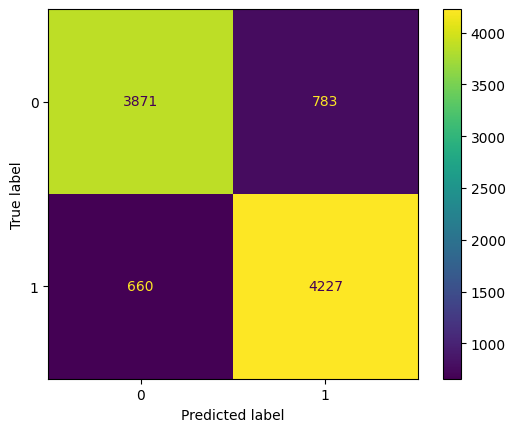

In [5]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

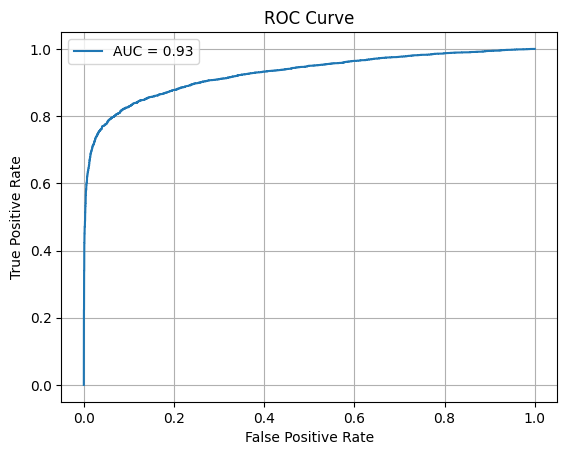

In [6]:
y_prob = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()